In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Set matplotlib font to resemble LaTeX's default font (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

def plot_multiple_pulse_trains(num_rows, intervals_list=None, pulse_width=0.5, 
                             amplitudes=None, colors=None, hatches=None, figsize=(12, 8),
                             labels=None, left_margin=1.5):
    """
    Plot multiple pulse trains with labels outside the circuit area.
    """
    
    # Set default values
    if colors is None:
        colors = plt.cm.viridis(np.linspace(0, 1, num_rows))
    if hatches is None:
        hatches = [None] * num_rows
    if amplitudes is None:
        amplitudes = [1] * num_rows
    if labels is None:
        labels = [f"Row {i+1}" for i in range(num_rows)]
    
    # Convert pulse_width to list if it's a single value
    if not isinstance(pulse_width, (list, tuple)):
        pulse_width = [pulse_width] * num_rows
    
    # Create figure with adjusted height
    fig, axs = plt.subplots(num_rows, 1, figsize=figsize, height_ratios=[1]*num_rows)
    if num_rows == 1:
        axs = [axs]
    
    # Find global amplitude range and ensure minimum range
    amp_max = max(amplitudes)
    amp_min = min(amplitudes)
    if amp_max == amp_min:  # Handle case where all amplitudes are the same
        amp_max = amp_min + 1
        amp_min = amp_min - 1
    y_margin = 0.1 * max(amp_max - amp_min, 2)  # Ensure minimum margin
    
    # Generate each pulse train
    for idx, (intervals, width, amplitude, color, hatch, label) in enumerate(
            zip(intervals_list, pulse_width, amplitudes, colors, hatches, labels)):
        
        # Create time array (only from 0 to 10 for the circuit)
        t = np.linspace(0, 10, 1000)
        pulse_train = np.zeros_like(t)
        
        # Generate pulses
        for interval in intervals:
            pulse = (np.abs(t - interval) <= width/2)
            pulse_train = np.maximum(pulse_train, pulse)
        
        # Apply amplitude
        pulse_train = pulse_train * amplitude
        
        # Add label to the left of the vertical line
        axs[idx].text(-left_margin*0.5, 0, label, 
                     size=25,
                     verticalalignment='center', 
                     horizontalalignment='right')
        
        # Add vertical connecting line
        axs[idx].plot([0, 0], [-0.2, 0.2], 
                     color='black', linewidth=1)
        
        # Plot pulses (starting exactly at x=0)
        axs[idx].fill_between(t, pulse_train, 0, color=color, alpha=0.5, hatch=hatch)
        axs[idx].plot(t, pulse_train, color=color, alpha=0.8, linewidth=1)
        
        # Remove axes and spines
        axs[idx].set_xticks([])
        axs[idx].set_yticks([])
        for spine in axs[idx].spines.values():
            spine.set_visible(False)
            
        # Set consistent limits with minimum range for y-axis
        axs[idx].set_xlim(-left_margin, 10)
        if amplitude >= 0:
            axs[idx].set_ylim(-0.2, amplitude + 0.2)
        else:
            axs[idx].set_ylim(amplitude - 0.2, 0.2)
    
    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.4, left=0.15, right=0.95, top=0.95, bottom=0.05)
    
    return fig, axs

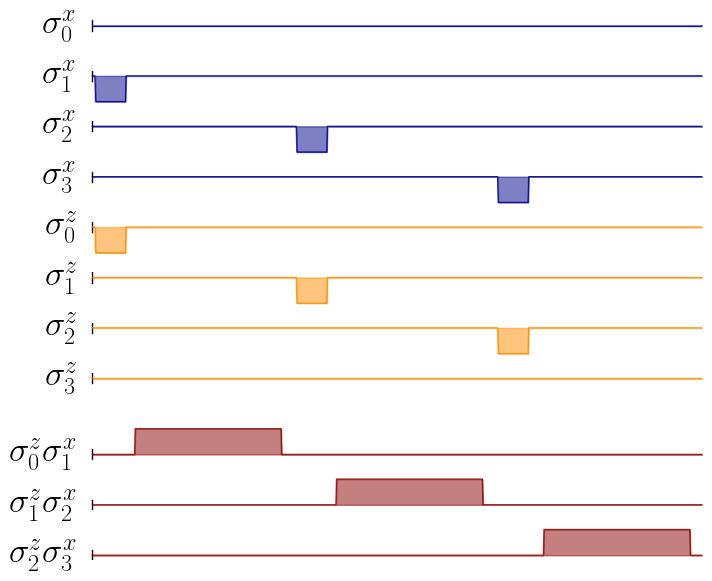

In [2]:
# GHZ state preparation
intervals_list = [
    [],  [0.3], [3.6], [6.9],
    [0.3], [3.6], [6.9], [],
    [1.9], [5.2],[8.6]
]

amplitudes = [-1, -1, -1, -1,
              -1, -1, -1, -1,
              1, 1, 1]

pulse_width = [0.5, 0.5, 0.5, 0.5,
              0.5, 0.5, 0.5, 0.5,
              2.4, 2.4, 2.4]

colors=['darkblue', 'darkblue', 'darkblue', 'darkblue',
        'darkorange', 'darkorange', 'darkorange', 'darkorange',
        'darkred', 'darkred', 'darkred']

labels=[r'$\sigma_{0}^{x}$', r'$\sigma_{1}^{x}$', r'$\sigma_{2}^{x}$', r'$\sigma_{3}^{x}$',
        r'$\sigma_{0}^{z}$', r'$\sigma_{1}^{z}$', r'$\sigma_{2}^{z}$', r'$\sigma_{3}^{z}$',
        r'$\sigma_{0}^{z}\sigma_{1}^{x}$', r'$\sigma_{1}^{z}\sigma_{2}^{x}$', r'$\sigma_{2}^{z}\sigma_{3}^{x}$']

fig, axs = plot_multiple_pulse_trains(
    num_rows=11,
    intervals_list=intervals_list,
    pulse_width=pulse_width,
    amplitudes=amplitudes,
    colors=colors,
    labels=labels,
    left_margin=0.5,
    figsize=(8, 6)
)

plt.savefig("../fig/pulse_ghz_state_preparation.pdf")

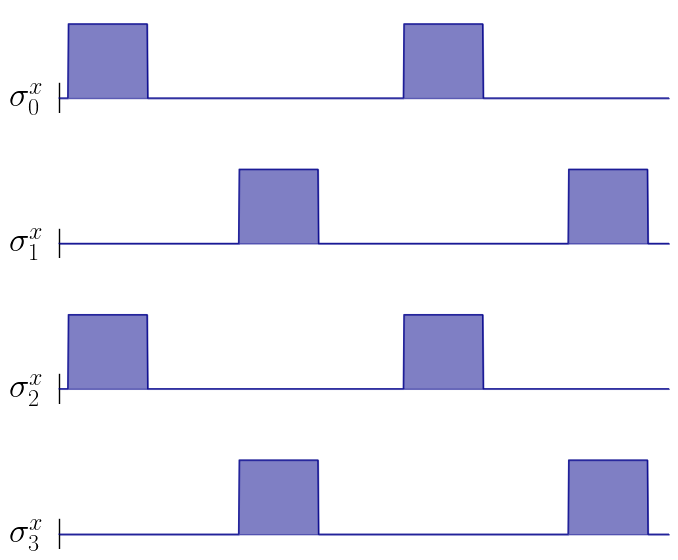

In [3]:
# crosstalk suppression
intervals_list = [
    [0.8, 6.3],
    [3.6, 9.0], 
    [0.8, 6.3], 
    [3.6, 9.0]
]

amplitudes = [1, 1, 1, 1]

pulse_width = [1.3, 1.3, 1.3, 1.3]

colors=['darkblue', 'darkblue', 'darkblue', 'darkblue']

labels=[r'$\sigma_{0}^{x}$', r'$\sigma_{1}^{x}$', r'$\sigma_{2}^{x}$', r'$\sigma_{3}^{x}$']

fig, axs = plot_multiple_pulse_trains(
    num_rows=4,
    intervals_list=intervals_list,
    pulse_width=pulse_width,
    amplitudes=amplitudes,
    colors=colors,
    labels=labels,
    left_margin=0.5,
    figsize=(8, 6)
)
#plt.show()
plt.savefig("../fig/pulse_crosstalk_suppression.pdf")